In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, zero_division=0)

    print("Evaluation Metrics")
    print("----------------------")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("----------------------")
    print("\nClassification Report:\n", report)
    print("----------------------")
    print("Confusion Matrix:\n")
    classes = ["non-SQL Injection", "SQL Injection"];
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()



In [30]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

pred = pd.read_csv("/content/drive/MyDrive/ensemble_predictions.csv", engine='python')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
pred

,Query,True_Label,Ensemble_Prediction
0,A pretentious but - to varying degrees - watch...,0.0,0
1,Tamar-Mattis said organization supports Austr...,0.0,0
2,5337,0.0,0
3,SELECT * FROM nothing WHERE quick NOT LIKE '[s...,0.0,0
4,SELECT TOP 50 PERCENT * FROM according SELECT ...,0.0,0
...,...,...,...
32691,60929799q,0.0,0
32692,Corridors of time. The movie you can watch if ...,0.0,0
32693,For the sake of propaganda during World War II...,0.0,0
32694,9999999999999999999999999999999999999999999999...,1.0,1


from matplotlib import pyplot as plt
pred['True_Label'].plot(kind='hist', bins=20, title='True_Label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pred['Ensemble_Prediction'].plot(kind='hist', bins=20, title='Ensemble_Prediction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pred.plot(kind='scatter', x='True_Label', y='Ensemble_Prediction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pred['True_Label'].plot(kind='line', figsize=(8, 4), title='True_Label')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pred['Ensemble_Prediction'].plot(kind='line', figsize=(8, 4), title='Ensemble_Prediction')
plt.gca().spines[['top', 'right']].set_visible(False)

Evaluation Metrics
----------------------
Accuracy:  0.9866
Precision: 0.9868
Recall:    0.9866
F1 Score:  0.9866
----------------------

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     17202
         1.0       1.00      0.97      0.99     15494

    accuracy                           0.99     32696
   macro avg       0.99      0.99      0.99     32696
weighted avg       0.99      0.99      0.99     32696

----------------------
Confusion Matrix:



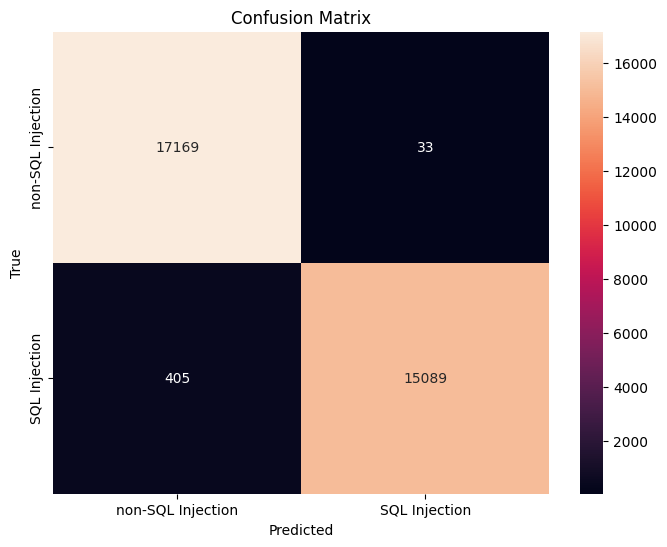

In [32]:
evaluate_model(pred["True_Label"], pred["Ensemble_Prediction"])